<a href="https://colab.research.google.com/github/durgeshanalyst/Placed-Unplaced-Model-Creation/blob/main/Placed_Unplaced_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('Placement_Data.csv')

In [ ]:
data.head(1)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0


# Get all features name

In [ ]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

#### Numbber of records and clumn

In [ ]:
data.shape # number rof record ke liye df.shape[1]

(215, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
# note model can understand only integer and numeric bvalues

### What is the average Secondary Education percentage - 10th Grade

In [ ]:
data.ssc_p.mean()

67.3033953488372

## max of ssc_p

In [ ]:
data.ssc_p.max()

89.4

### toppers are there in 10 rade

In [ ]:
data[data['ssc_p']==data['ssc_p'].max()].shape[0]

1

### is the student got secondery educaton percentage . placed or not

In [ ]:
data[data['ssc_p'] == data['ssc_p'].max()]['status']


145    Placed
Name: status, dtype: object

### How many placed or unplaced

In [ ]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

### Mst common degree who has pplaced

In [ ]:
data[data['status']=='Placed']['degree_t'].value_counts().head(1)

Comm&Mgmt    102
Name: degree_t, dtype: int64

#### How many uniqu degree are there in the datset


In [ ]:
data['degree_t'].nunique()

3

In [ ]:
data[['hsc_p','ssc_p']].corr()

,hsc_p,ssc_p
hsc_p,1.000000,0.511472
ssc_p,0.511472,1.000000


In [ ]:
data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.063764
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.063764,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


### Data Pre Processing

### Identify column which can be remove}

##### Remove unnecessery column

In [ ]:
data.drop(columns=['sl_no'],inplace=True)

In [ ]:
data.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.0,Others,91.0,Others,Commerce,58.0,Sci&Tech,No,55.0,Mkt&HR,58.8,Placed,270000.0


In [ ]:
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

#### Fill the missing vlues with appropriate values ad chec ny

In [ ]:
data.fillna(0,inplace=True)

In [ ]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Data Viualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#### scatter plot btwn 10th and 12th % with label and title

Text(0.5, 1.0, 'scatter plot btwn 10th and 12th')

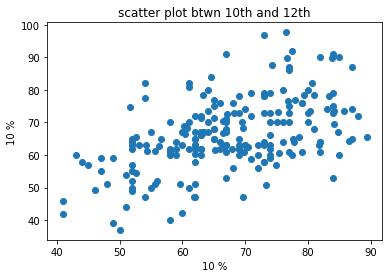

In [ ]:
plt.scatter(data['ssc_p'],data['hsc_p'])
plt.xlabel('10 %')
plt.ylabel('10 %')
plt.title('scatter plot btwn 10th and 12th')

#### Draw the scatter plot between 10th and 12th class percentage of students grouped based on placement data


In [ ]:
colors={'Placed':'tab:green','Not Placed':'tab:red'}
data['status'].map(colors)

0      tab:green
1      tab:green
2      tab:green
3        tab:red
4      tab:green
         ...    
210    tab:green
211    tab:green
212    tab:green
213    tab:green
214      tab:red
Name: status, Length: 215, dtype: object

Text(0.5, 1.0, 'scatter plot btwn 10th and 12th')

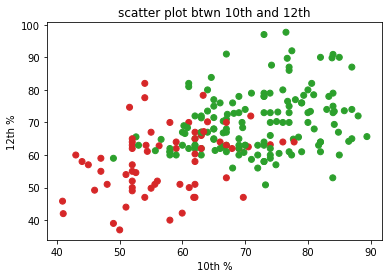

In [ ]:
plt.scatter(data['ssc_p'],data['hsc_p'],c=data['status'].map(colors))
plt.xlabel('10th %')
plt.ylabel('12th %')
plt.title('scatter plot btwn 10th and 12th')

#### Draw the pairplots between all continous collumns

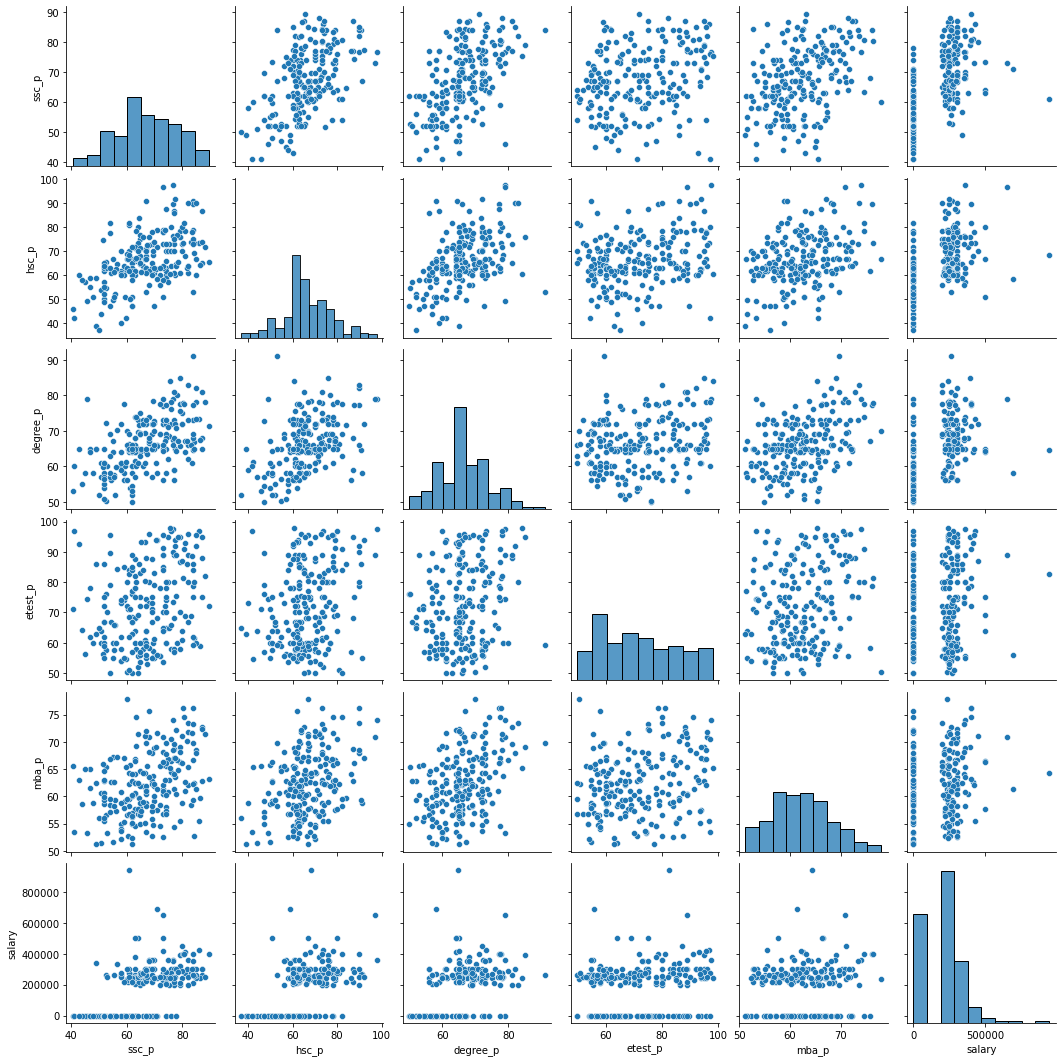

In [ ]:
sns.pairplot(data)

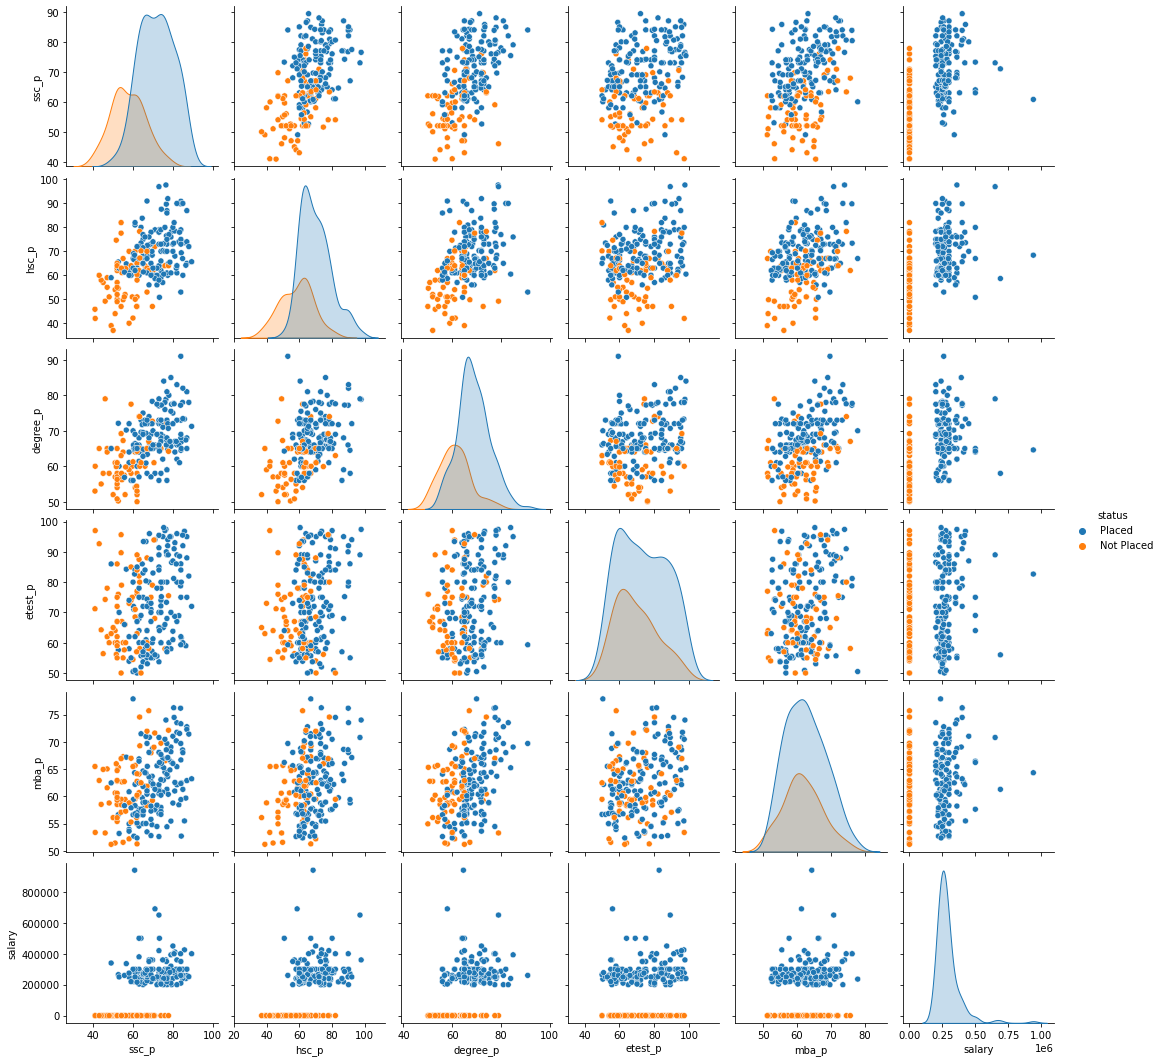

In [ ]:
sns.pairplot(data,hue='status') # or for this STD as histo sns.pairplot(data,hue='status',diag_kind='hist') 

### Draw a box plot for 10th % student

<AxesSubplot:ylabel='ssc_p'>

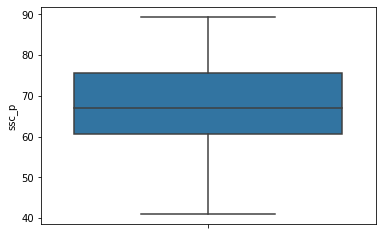

In [ ]:
sns.boxplot(y='ssc_p',data=data)

In [ ]:
### Draw a box plot for 12th % student

<AxesSubplot:ylabel='hsc_p'>

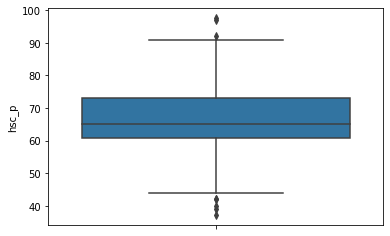

In [ ]:
sns.boxplot(y='hsc_p',data=data)

#### Draw a box plot for12 th percentage of the student for placed and unplaced

<AxesSubplot:xlabel='status', ylabel='hsc_p'>

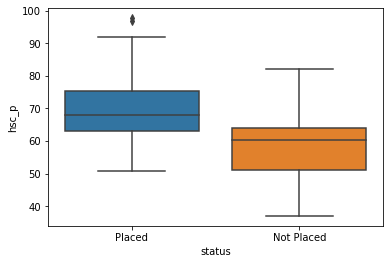

In [ ]:
sns.boxplot(y='hsc_p',data=data,x='status')

#### Draw lineplot for 10th, 12th, degree and MBA percentage


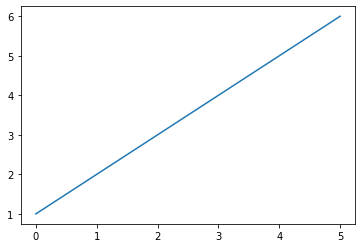

In [ ]:
y= [1,2,3,4,5,6]
plt.plot(y)

In [ ]:
#line chart depend on order of the value

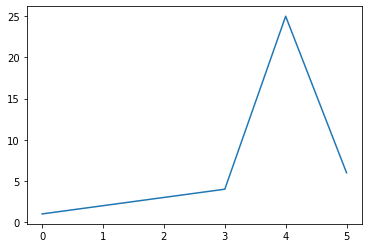

In [ ]:
y= [1,2,3,4,25,6]
plt.plot(y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'fdsfhg')

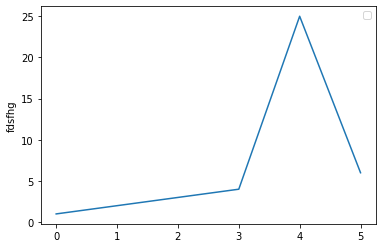

In [ ]:
y= [1,2,3,4,25,6]
plt.plot(y)
plt.legend()
plt.ylabel('fdsfhg')

#### Draw line plot for 10th 12th and degree and mba in sma eplot

In [ ]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


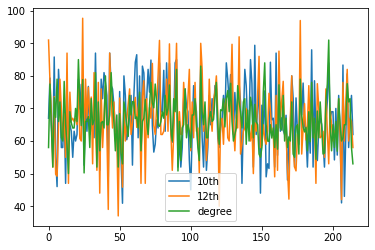

In [ ]:
plt.plot(data['ssc_p'],label='10th')
plt.plot(data['hsc_p'],label='12th')
plt.plot(data['degree_p'],label='degree')
plt.legend()

#### find the correlation  bbw continuous colmn

In [ ]:
data.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


### Draw the heat map of correlation

In [ ]:
#heatmap visu.. is method of graphical 

<AxesSubplot:>

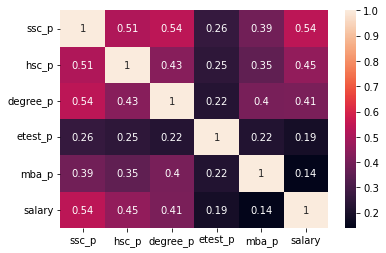

In [ ]:
sns.heatmap(data.corr(),annot=True)

#### Draw histogram foe salary

(array([67.,  0., 94., 38., 10.,  3.,  1.,  1.,  0.,  1.]),
 array([     0.,  94000., 188000., 282000., 376000., 470000., 564000.,
        658000., 752000., 846000., 940000.]),
 <BarContainer object of 10 artists>)

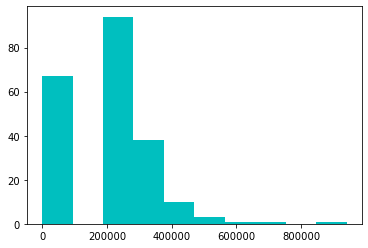

In [ ]:
plt.hist(data['salary'],color='c')

#### Draw the distribution of 10th Gade %

<AxesSubplot:xlabel='ssc_p', ylabel='Density'>

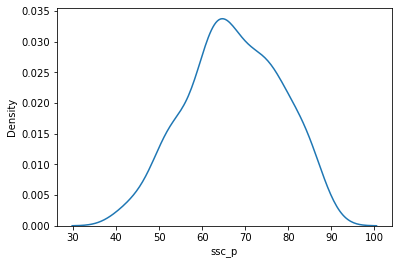

In [ ]:
sns.kdeplot(data['ssc_p'])  #kernal density estimate means from what distribution data is coming

# Outlier Analysis

In [ ]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


<AxesSubplot:ylabel='degree_p'>

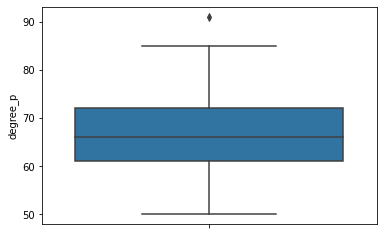

In [ ]:
sns.boxplot(y='degree_p',data=data)

In [ ]:
percentile25=data['degree_p'].quantile(0.25)
percentile25

61.0

In [ ]:
percentile75=data['degree_p'].quantile(0.75)
percentile75

72.0

In [ ]:
IQR=percentile75-percentile25
IQR

11.0

In [ ]:
Ulimit=percentile75+(1.5*IQR)
Ulimit

88.5

In [ ]:
Llimit=percentile25-(IQR*1.5)
Llimit

44.5

In [ ]:
df=data[(data['degree_p']<Ulimit) & (data['degree_p']>Llimit)]
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


<AxesSubplot:ylabel='degree_p'>

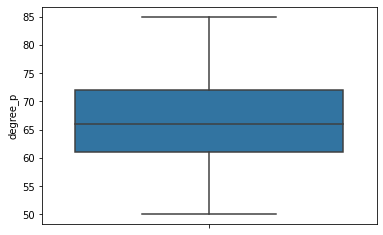

In [ ]:
sns.boxplot(y='degree_p',data=df)

In [ ]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

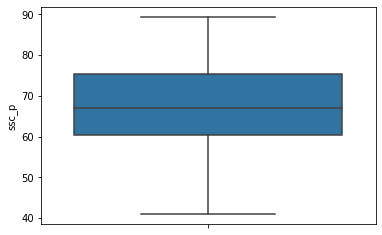

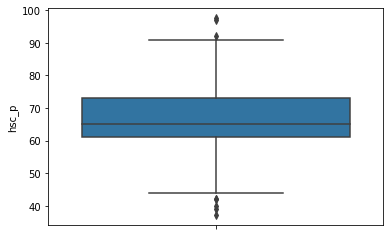

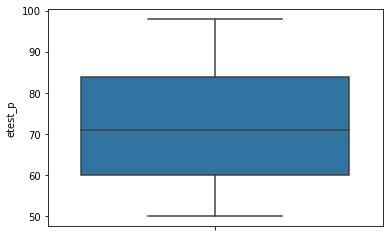

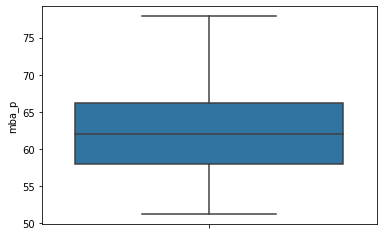

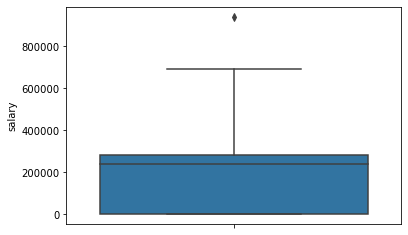

In [ ]:
col=['ssc_p','hsc_p','etest_p','mba_p','salary']
for c in col:
    plt.figure()
    sns.boxplot(y=c,data=df)

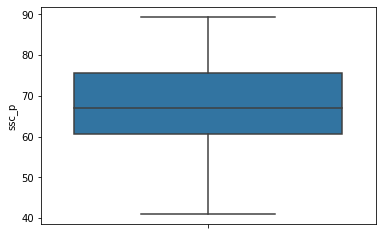

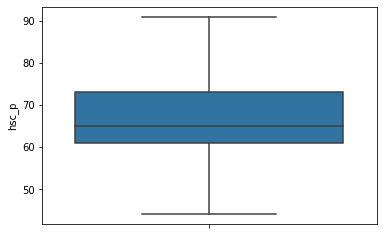

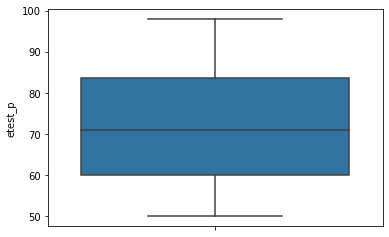

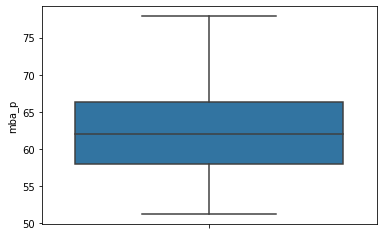

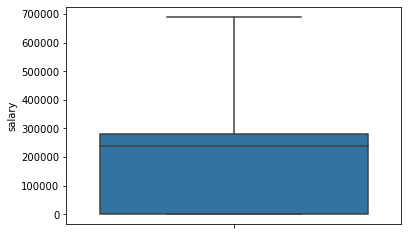

In [ ]:
col=['ssc_p','hsc_p','etest_p','mba_p','salary']
for c in col:
    percentile25=data[c].quantile(0.25)
    percentile75=data[c].quantile(0.75)
    IQR=percentile75-percentile25
    Ulimit=percentile75+(1.5*IQR)
    Llimit=percentile25-(IQR*1.5)
    df=data[(data[c]<Ulimit) & (data[c]>Llimit)]
    plt.figure()
    sns.boxplot(y=c,data=df)

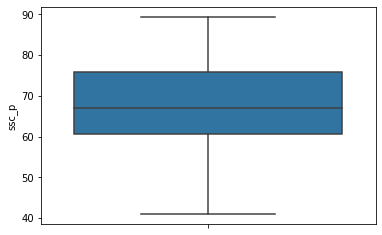

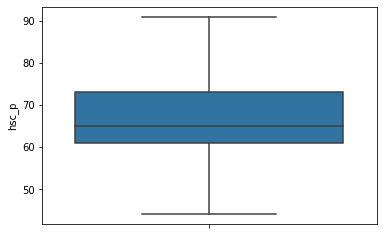

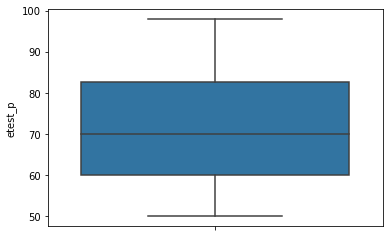

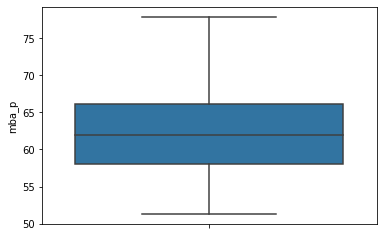

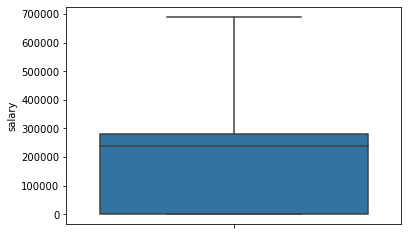

In [ ]:
col=['ssc_p','hsc_p','etest_p','mba_p','salary']
for c in col:
  percentile25=df[c].quantile(0.25)
  percentile75=df[c].quantile(0.75)
  iqr=percentile75-percentile25
  upper_limit=percentile75+(1.5*iqr)
  lower_limit=percentile25-(1.5*iqr)
  df=df[(df[c]<upper_limit) & (df[c]>lower_limit)]
  plt.figure()
  sns.boxplot(y=c, data=df)

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
from sklearn .preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['ssc_b']

0       Others
1      Central
2      Central
3      Central
4      Central
        ...   
210     Others
211     Others
212     Others
213     Others
214    Central
Name: ssc_b, Length: 206, dtype: object

In [ ]:
le.fit_transform(df['ssc_b'])

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
col2=['ssc_b','gender','hsc_b','hsc_s','degree_t','workex','specialisation','status']


In [ ]:
for c in col2:
    df[c]=le.fit_transform(df[c])

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


### Extract the dependent and independent variable

In [ ]:
x=df.iloc[:,0:-1].values # use value becaus ewe can pass array to the model so
x

array([[ 1.  , 67.  ,  1.  , ...,  1.  , 58.8 ,  1.  ],
       [ 1.  , 79.33,  0.  , ...,  0.  , 66.28,  1.  ],
       [ 1.  , 65.  ,  0.  , ...,  0.  , 57.8 ,  1.  ],
       ...,
       [ 1.  , 67.  ,  1.  , ...,  0.  , 69.72,  1.  ],
       [ 0.  , 74.  ,  1.  , ...,  1.  , 60.23,  1.  ],
       [ 1.  , 62.  ,  0.  , ...,  1.  , 60.22,  0.  ]])

In [ ]:
y=df.iloc[:,-1].values
y

array([270000., 200000., 250000.,      0., 425000.,      0.,      0.,
       252000., 231000.,      0., 260000., 250000.,      0., 218000.,
            0., 200000., 300000.,      0.,      0., 236000., 265000.,
       393000., 360000., 300000.,      0., 240000., 265000., 350000.,
            0., 250000.,      0., 278000., 260000.,      0., 300000.,
            0., 320000., 240000., 411000., 287000.,      0., 300000.,
       200000.,      0.,      0., 204000., 250000., 200000.,      0.,
            0., 450000., 216000., 220000., 240000., 360000., 268000.,
       265000., 260000., 300000., 240000.,      0., 240000.,      0.,
       275000., 275000.,      0., 275000., 360000., 240000., 240000.,
       218000., 336000.,      0., 230000., 500000., 270000.,      0.,
       240000., 300000.,      0., 300000., 300000., 400000., 220000.,
            0., 210000., 210000., 300000.,      0., 230000.,      0.,
       260000., 420000., 300000.,      0., 220000.,      0.,      0.,
       380000., 3000

## split the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4) #if you will not use random then jab bhi run kroge value change ho gi

In [ ]:
x_train,x_test,y_train,y_test

(array([[ 1.  , 68.2 ,  0.  , ...,  0.  , 70.85,  1.  ],
        [ 1.  , 52.  ,  0.  , ...,  1.  , 62.79,  0.  ],
        [ 1.  , 63.  ,  0.  , ...,  0.  , 62.54,  1.  ],
        ...,
        [ 1.  , 67.  ,  1.  , ...,  0.  , 61.01,  1.  ],
        [ 1.  , 52.  ,  1.  , ...,  0.  , 59.81,  0.  ],
        [ 0.  , 72.  ,  1.  , ...,  1.  , 58.4 ,  1.  ]]),
 array([[ 1.  , 79.33,  0.  , 78.33,  1.  ,  2.  , 77.48,  2.  ,  1.  ,
         86.5 ,  0.  , 66.28,  1.  ],
        [ 0.  , 83.84,  1.  , 89.83,  1.  ,  1.  , 77.2 ,  0.  ,  1.  ,
         78.74,  0.  , 76.18,  1.  ],
        [ 0.  , 69.  ,  0.  , 62.  ,  0.  ,  2.  , 66.  ,  2.  ,  0.  ,
         75.  ,  1.  , 67.99,  0.  ],
        [ 1.  , 59.  ,  0.  , 64.  ,  1.  ,  2.  , 58.  ,  2.  ,  0.  ,
         85.  ,  1.  , 55.3 ,  0.  ],
        [ 1.  , 56.6 ,  0.  , 64.8 ,  0.  ,  1.  , 70.2 ,  0.  ,  0.  ,
         84.27,  0.  , 67.2 ,  1.  ],
        [ 1.  , 52.  ,  1.  , 55.  ,  1.  ,  1.  , 56.3 ,  0.  ,  0.  ,
         59.  ,  0.  

### Use sttandardization and perform lnear Regression

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
sc.fit_transform(x_train)

array([[ 0.73484692,  0.05519303, -0.94933375, ..., -0.87756193,
         1.49755078,  0.66276115],
       [ 0.73484692, -1.41575636, -0.94933375, ...,  1.13952072,
         0.06108154, -1.5088392 ],
       [ 0.73484692, -0.41696356, -0.94933375, ..., -0.87756193,
         0.01652604,  0.66276115],
       ...,
       [ 0.73484692, -0.05376618,  1.05337032, ..., -0.87756193,
        -0.25615361,  0.66276115],
       [ 0.73484692, -1.41575636,  1.05337032, ..., -0.87756193,
        -0.47001999, -1.5088392 ],
       [-1.36082763,  0.40023054,  1.05337032, ...,  1.13952072,
        -0.721313  ,  0.66276115]])

In [ ]:
x_test=sc.transform(x_test)
x_test

array([[ 0.73484692,  1.06578974, -0.94933375,  1.15447503,  0.77728159,
         1.06464919,  1.54627244,  1.48078061,  1.38045658,  1.0874858 ,
        -0.87756193,  0.68307628,  0.66276115],
       [-1.36082763,  1.47529478,  1.05337032,  2.31703085,  0.77728159,
        -0.6256186 ,  1.50693321, -0.70142239,  1.38045658,  0.51832438,
        -0.87756193,  2.44747398,  0.66276115],
       [-1.36082763,  0.12783251, -0.94933375, -0.49635422, -1.28653504,
         1.06464919, -0.06663583,  1.48078061, -0.72439801,  0.24401205,
         1.13952072,  0.98783589, -1.5088392 ],
       [ 0.73484692, -0.78016094, -0.94933375, -0.2941706 ,  0.77728159,
         1.06464919, -1.19061372,  1.48078061, -0.72439801,  0.97746749,
         1.13952072, -1.27380117, -1.5088392 ],
       [ 0.73484692, -0.99807937, -0.94933375, -0.21329715, -1.28653504,
        -0.6256186 ,  0.52345256, -0.70142239, -0.72439801,  0.92392524,
        -0.87756193,  0.84704051,  0.66276115],
       [ 0.73484692, -1.415756

# Perform linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
y_pred=reg.fit(x_train,y_train)            #(x_train,y_train)

In [ ]:
reg.intercept_

-64884.547827187576

In [ ]:
reg.coef_

array([ 2.63889618e+04,  7.48913360e+01,  7.23872743e+03, -2.14091333e+02,
       -9.19922459e+03,  7.55908268e+03, -9.41843048e+02,  1.55410654e+04,
       -6.70495483e+02,  2.51897295e+02, -6.62920773e+03,  1.39891837e+03,
        2.81259335e+05])

In [ ]:
Y_pred=reg.predict(x_test)
Y_pred

array([ 162451.14439198,   77098.56894895, -494593.09840703,
       -460307.70137067,  137447.08936091, -476884.30789202,
        135042.11824273,  130307.82298707,  114119.72384368,
       -486816.93010065,  133653.42268531,   75858.24567266,
        118089.61406078, -460115.38583116,   66976.07249766,
        145386.96339468,   74793.6435308 ,  174128.47281228,
       -478574.03664928,  131000.06970072,  133712.20386826,
        166441.97398223,  134660.1934181 ,  129775.90588214,
        114409.46181662, -542250.61337681,   93256.91919866,
       -523151.29433192,   91736.21197634, -487700.58859704,
        122454.17492477,   76638.98087877, -537678.44845819,
        134727.00176206,   95689.85473198,   80324.35067734,
       -474269.38992188, -492109.02474644,  118863.22206983,
       -493294.44846567,  116514.39206184,  136777.08440444,
        117467.01112237,   61648.4221506 ,   70768.39358282,
        114982.74599149,  169259.49432747, -486243.65590173,
        178821.80539088,

In [ ]:
y_test

array([200000., 400000.,      0.,      0., 336000.,      0., 300000.,
       300000., 265000.,      0., 250000., 210000., 300000.,      0.,
       300000., 240000., 300000., 250000.,      0., 220000., 400000.,
       255000., 204000., 240000., 250000.,      0., 230000.,      0.,
       300000.,      0., 210000., 280000.,      0., 260000., 250000.,
       200000.,      0.,      0., 260000.,      0., 420000., 300000.,
       265000., 240000., 300000., 240000., 240000.,      0., 500000.,
       350000.,      0., 250000.])

### Evaluate the model using MSE, RMSE and R square


In [ ]:
from sklearn import metrics

In [ ]:
mse=metrics.mean_squared_error(y_test,Y_pred)
mse

93241647311.78693

In [ ]:
rmse=np.sqrt(mse)
rmse

305354.95298387896

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


### Moving towards Logisttic Regression

### Extract the independent and dependent variable

In [ ]:
X=df.drop(['status','salary'],axis=1).values
X

array([[ 1.  , 67.  ,  1.  , ..., 55.  ,  1.  , 58.8 ],
       [ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [ ]:
#X=df.iloc[:,:-2]
#using iloc for the same

In [ ]:
Y=df['status'].values
Y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0])

### split the dataset into trainng and testing datset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42) #if you will not use random then jab bhi run kroge value change ho gi

In [ ]:
x_train,x_test,y_train,y_test

(array([[ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
        [ 1.  , 68.  ,  1.  , ..., 73.  ,  1.  , 68.07],
        [ 0.  , 69.  ,  0.  , ..., 70.  ,  0.  , 57.31],
        ...,
        [ 1.  , 73.  ,  0.  , ..., 95.46,  0.  , 62.16],
        [ 1.  , 78.5 ,  0.  , ..., 95.  ,  0.  , 64.86],
        [ 1.  , 59.  ,  0.  , ..., 85.  ,  1.  , 55.3 ]]),
 array([[ 0.  , 65.  ,  0.  , 75.  ,  0.  ,  1.  , 69.  ,  0.  ,  1.  ,
         72.  ,  0.  , 64.66],
        [ 1.  , 58.  ,  0.  , 70.  ,  0.  ,  1.  , 61.  ,  0.  ,  0.  ,
         54.  ,  0.  , 52.21],
        [ 1.  , 80.6 ,  1.  , 82.  ,  1.  ,  1.  , 77.6 ,  0.  ,  0.  ,
         91.  ,  0.  , 74.49],
        [ 0.  , 83.84,  1.  , 89.83,  1.  ,  1.  , 77.2 ,  0.  ,  1.  ,
         78.74,  0.  , 76.18],
        [ 1.  , 75.  ,  1.  , 70.29,  1.  ,  1.  , 71.  ,  0.  ,  0.  ,
         95.  ,  0.  , 66.94],
        [ 0.  , 45.  ,  1.  , 57.  ,  1.  ,  1.  , 58.  ,  0.  ,  1.  ,
         56.39,  1.  , 64.95],
        [ 1.  , 61.8 ,  1

### Use standardization

In [ ]:
from sklearn.preprocessing import StandardScaler # StandardScaler sed when you dot have gausian , minmax used when no outlier while both will give same result

In [ ]:
sc=StandardScaler()

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)#we can use fit_transform also but this is best practise

### Build the Logistic Regression

In [ ]:
y_train

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0])

In [ ]:
y_test

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [ ]:
classifier.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
#by default thresold = 0.5

### Create the confusion martrix and draw the heatmap fro it

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[13,  3],
       [ 2, 34]], dtype=int64)

In [ ]:
confusion_matrix(y_test,y_pred).ravel()# to get in 1d array

array([13,  3,  2, 34], dtype=int64)

In [ ]:
tn,fn,tp,fp=confusion_matrix(y_test,y_pred).ravel()

In [ ]:
tn,tp,fn,fp

(13, 2, 3, 34)

<AxesSubplot:>

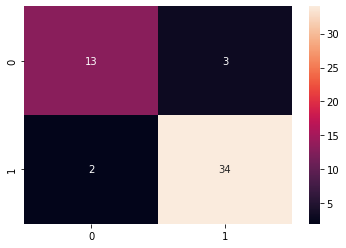

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

## Find out the Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9038461538461539

### find out the aur roc

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8784722222222222

### Find out number of 0 classes in y test

In [ ]:
sum(y_test==0)

16

In [ ]:
sum(y_test==1)

36

### find out the recall and precision

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)#high recal great model

0.9444444444444444

### Create the classification report and understand each term in it


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       0.92      0.94      0.93        36

    accuracy                           0.90        52
   macro avg       0.89      0.88      0.89        52
weighted avg       0.90      0.90      0.90        52



In [ ]:
#support = number of 0 and 1, its just the number of 0 ,1, ad both in y test
#precision= 

In [ ]:
classifier.predict_proba(x_test)[:,1]

array([0.90365254, 0.83898194, 0.99016787, 0.99778071, 0.95438331,
       0.02262752, 0.32199138, 0.22429157, 0.56591186, 0.88388189,
       0.96608661, 0.91890569, 0.65583406, 0.31400609, 0.92494822,
       0.99015437, 0.39247811, 0.97806508, 0.98789845, 0.0091401 ,
       0.79185097, 0.07823747, 0.97363648, 0.3796723 , 0.99368751,
       0.88669323, 0.34404386, 0.90196204, 0.95371281, 0.26011642,
       0.83901895, 0.93521487, 0.38470771, 0.08631943, 0.7982352 ,
       0.9923224 , 0.82524942, 0.95955906, 0.80601578, 0.04478502,
       0.99755466, 0.89590292, 0.74941214, 0.10979501, 0.84792311,
       0.93770221, 0.01430405, 0.7328974 , 0.96261863, 0.96369499,
       0.60264447, 0.84930049])

In [ ]:
y_prd=(classifier.predict_proba(x_test)[:,1]>0.7).astype(int)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
fpr,tpr,thresold=metrics.roc_curve(y_test,classifier.predict_proba(x_test)[:,1])

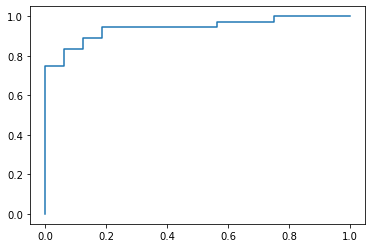

In [ ]:
plt.plot(fpr,tpr)

# Moving towards decision tree

### Extracting dependent and independent variavle

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,2
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,0


In [ ]:
x=df.drop(['status','salary'],axis=1).values

In [ ]:
x

array([[ 1.  , 67.  ,  1.  , ..., 55.  ,  1.  , 58.8 ],
       [ 1.  , 79.33,  0.  , ..., 86.5 ,  0.  , 66.28],
       [ 1.  , 65.  ,  0.  , ..., 75.  ,  0.  , 57.8 ],
       ...,
       [ 1.  , 67.  ,  1.  , ..., 59.  ,  0.  , 69.72],
       [ 0.  , 74.  ,  1.  , ..., 70.  ,  1.  , 60.23],
       [ 1.  , 62.  ,  0.  , ..., 89.  ,  1.  , 60.22]])

In [ ]:
y=df['status'].values
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()

In [ ]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dc.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[11,  6],
       [ 4, 41]], dtype=int64)

In [ ]:
accuracy_score(y_test,y_pred)

0.8387096774193549

In [ ]:
y_pred_train=dc.predict(x_train)

In [ ]:
accuracy_score(y_train,y_pred_train)

1.0

In [ ]:
from sklearn import tree

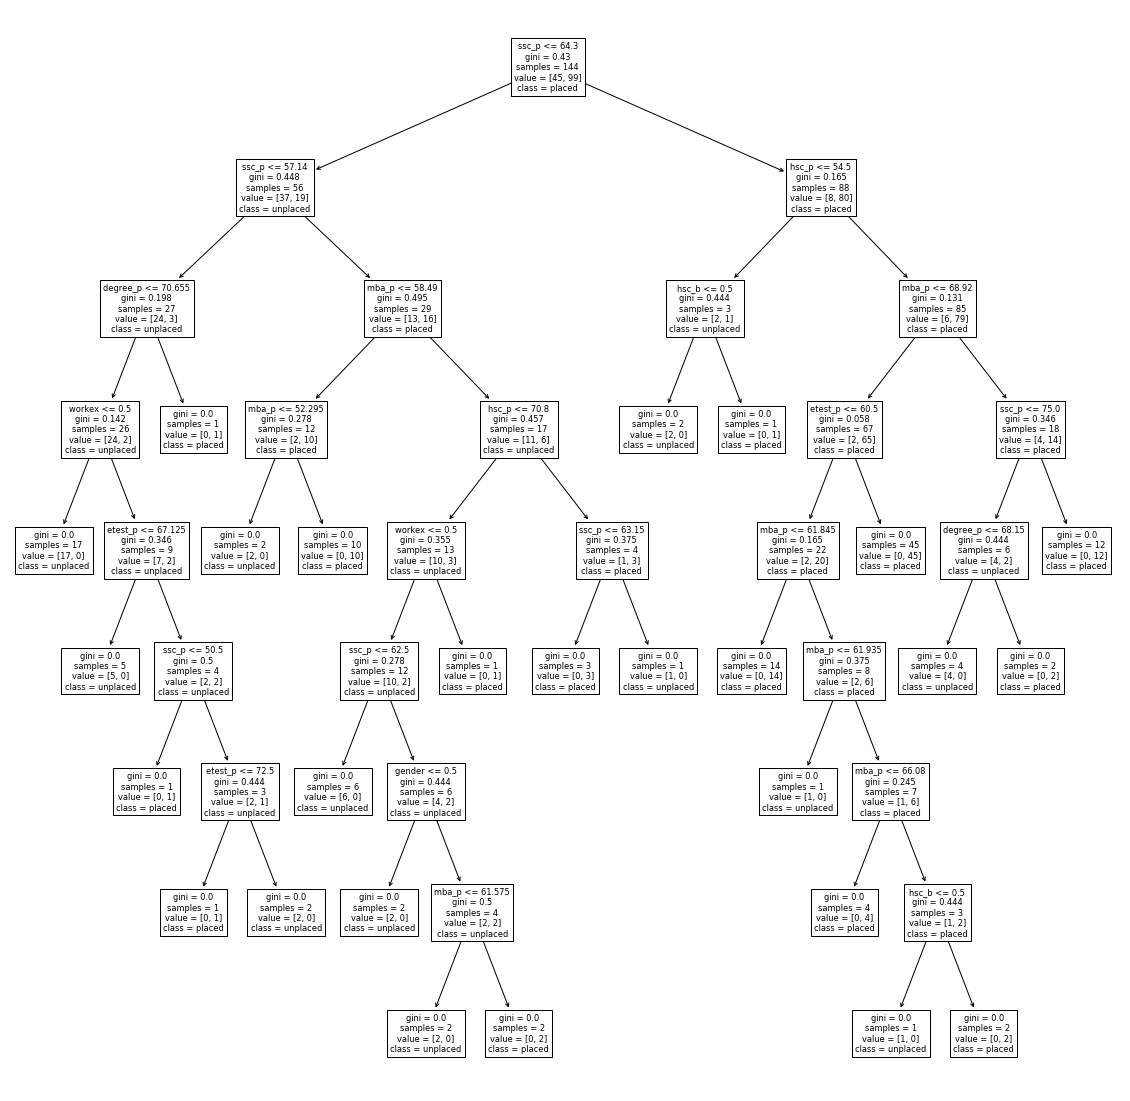

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(dc,feature_names=df.columns[:-2],class_names=['unplaced','placed'])
plt.show()

### Moving towards Random forest

In [ ]:
df.head(1)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.0,1,91.0,1,1,58.0,2,0,55.0,1,58.8,1,270000.0


In [ ]:
n_estimators=[10,20,30,40,50,60,70,80,90,100,150]


In [ ]:
max_features=['sqrt', 'log2']


In [ ]:
max_depth=np.linspace(10,120,10 ,dtype=int)


In [ ]:
criterion=["gini", "entropy"]


In [ ]:
min_samples_split=[2,4,6,8,10,12,14,16,18,20]


In [ ]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'criterion':criterion,
             'min_samples_split':min_samples_split}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rdsc = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 5, n_iter = 100 , n_jobs = 1)

In [ ]:
rdsc.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 10,  22,  34,  46,  58,  71,  83,  95, 107, 120]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14, 16, 18,
                                                              20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         150]})

In [ ]:
rdsc.best_params_

{'n_estimators': 20,
 'min_samples_split': 14,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [ ]:
rfbm=RandomForestClassifier(n_estimators= 50,min_samples_split= 2,
                            max_features = 'log2',max_depth = 34,
                            criterion= 'gini')

In [ ]:
rfbm

RandomForestClassifier(max_depth=34, max_features='log2', n_estimators=50)

In [ ]:
rfbm.fit(x_train,y_train)

RandomForestClassifier(max_depth=34, max_features='log2', n_estimators=50)

In [ ]:
y_pred = rfbm.predict(x_test)


In [ ]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.8548387096774194

In [ ]:
confusion_matrix(y_test,y_pred)

array([[12,  5],
       [ 4, 41]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        17
           1       0.89      0.91      0.90        45

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.85      0.85      0.85        62



### Clustering

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [ ]:
from sklearn.cluster import  KMeans

In [ ]:
new_df=df

In [ ]:
kmeans=KMeans(3)

In [ ]:
kmeans.fit(new_df)

KMeans(n_clusters=3)

In [ ]:
kmeans.predict(new_df)

array([1, 1, 1, 2, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 0,
       0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2,
       1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 0, 1, 1, 1, 2])

In [ ]:
new_df['clusters']=kmeans.predict(new_df)

In [ ]:
new_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,2
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,1


In [ ]:
kmeans.inertia_

252412404738.77954

In [ ]:
df# clusters column is coming in df ao becaus ewe have copied this 

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,2
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,1


In [ ]:
new_df=new_df.reset_index()

In [ ]:
new_df

,index,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,1
1,1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,1
2,2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,1
3,3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,2
4,4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,0
202,211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,1
203,212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,1
204,213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,1


### Use elbow method to find optimal numbers of cluster

In [ ]:
new_df.drop('clusters',axis=1,inplace=True)

In [ ]:
inertia_list=[]
for i in range(1,205):
    kmeans=KMeans(i)
    kmeans.fit(new_df)
    inertia_list.append(kmeans.inertia_)
    print(inertia_list)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4146751826985.489]
[4146751826985.489, 714949312250.3612]
[4146751826985.489, 714949312250.3612, 252413197274.42303]
[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862]
[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732]
[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372]
[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765]
[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911]
[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491]
[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 2975

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009]
[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 43981180

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965]
[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.97

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

[4146751826985.489, 714949312250.3612, 252413197274.42303, 154357441280.45862, 81283974165.07732, 51494998433.26372, 29755860920.511765, 17529131655.03911, 9716691510.28491, 7478271868.971747, 5857470929.592461, 4373434743.426556, 3515110228.484114, 2675431908.2078896, 2031903037.0965533, 1757448614.7302277, 1489858725.8029976, 1274737746.6053128, 1002866170.3130789, 841532650.3461214, 643231943.1788473, 439811806.8245565, 362443448.2180422, 286033044.0337792, 257642481.80833787, 218347274.8026827, 177378572.63837272, 150607741.46988106, 126599269.04941855, 102759198.59681009, 82050712.11623424, 68377160.59052259, 48885816.5287973, 36873094.75607591, 28626236.078042302, 23530632.084967576, 16901894.5338623, 11562628.218403965, 8885756.530253965, 5683747.980528966, 3676122.061478965, 2246167.608398965, 1382349.547651346, 711294.1166846794, 500722.32343356125, 453229.73534461315, 418354.2667040753, 385173.60829145106, 345973.2164221486, 323011.58121141867, 293495.7168773376, 267428.28080

In [ ]:
inertia_list

[4146751826985.489,
 714949312250.3612,
 252413197274.42303,
 154357441280.45862,
 81283974165.07732,
 51494998433.26372,
 29755860920.511765,
 17529131655.03911,
 9716691510.28491,
 7478271868.971747,
 5857470929.592461,
 4373434743.426556,
 3515110228.484114,
 2675431908.2078896,
 2031903037.0965533,
 1757448614.7302277,
 1489858725.8029976,
 1274737746.6053128,
 1002866170.3130789,
 841532650.3461214,
 643231943.1788473,
 439811806.8245565,
 362443448.2180422,
 286033044.0337792,
 257642481.80833787,
 218347274.8026827,
 177378572.63837272,
 150607741.46988106,
 126599269.04941855,
 102759198.59681009,
 82050712.11623424,
 68377160.59052259,
 48885816.5287973,
 36873094.75607591,
 28626236.078042302,
 23530632.084967576,
 16901894.5338623,
 11562628.218403965,
 8885756.530253965,
 5683747.980528966,
 3676122.061478965,
 2246167.608398965,
 1382349.547651346,
 711294.1166846794,
 500722.32343356125,
 453229.73534461315,
 418354.2667040753,
 385173.60829145106,
 345973.2164221486,
 32

## PCA

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,clusters
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0,2
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0,0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0,1
